In [33]:
import pandas as pd
import string
import secrets
import requests
import random
import json
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
from cycler import cycler

### Description of the project
1. Do this
2. Then that
3. in order to get
4. Results

In [2]:
def pw_gen_lower(size, chars=string.ascii_lowercase):
    return ''.join(secrets.choice(chars) for i in range (size))

In [3]:
def pw_gen_upper(size, chars=string.ascii_uppercase):
    return ''.join(secrets.choice(chars) for i in range (size))

In [4]:
def pw_gen_chars_digits(size, chars=string.ascii_uppercase+string.digits):
    return ''.join(secrets.choice(chars) for i in range (size))

In [5]:
def pw_gen_digits(size, chars=string.digits):
    return ''.join(secrets.choice(chars) for i in range (size))

In [6]:
def pw_gen_punctuation(size, chars=string.punctuation):
    return ''.join(secrets.choice(chars) for i in range (size))

In [7]:
def pw_gen_all(size, chars=string.ascii_letters + string.digits + string.punctuation + string.whitespace):
    return ''.join(secrets.choice(chars) for i in range(size))

In [8]:
def pw_gen_word(size):
    f = open('words.txt', 'r')
    all_words = f.read()
    words = all_words.split('\n')
    password = ' '.join(secrets.choice(words) for i in range(size))
    return password.replace(' ','-')

In [9]:
def pw_most_used(size):
    f = open('10kmost.txt', 'r')
    most_common = f.read()
    most_words = most_common.split('\n')
    password = ' '.join(secrets.choice(most_words) for i in range(size))
    return password.replace(' ','-')

In [10]:
pw_most_used(1)

'colton'

In [11]:
pw_gen_chars_digits(9)

'POBA33J7D'

In [12]:
import hashlib
# hashing passwords
from zxcvbn import zxcvbn
#estimating password strength and time to crack
# link to library: https://github.com/dwolfhub/zxcvbn-python
# list of passwords: https://github.com/danielmiessler/SecLists/tree/master/Passwords

In [13]:
def get_hash(password):
    message = str(password).encode()
    hashed_pw = hashlib.sha1(message).hexdigest()
    five_chars = hashed_pw[:5]
    return (hashed_pw, five_chars)

In [14]:
get_hash('p@ssw0rd')

('57b2ad99044d337197c0c39fd3823568ff81e48a', '57b2a')

In [ ]:
hibp_url = 'https://api.pwnedpasswords.com/range/' + five_chars
print(hibp_url)
response = requests.get(hibp_url)
chars_found = response.text.split('\n')
chars_found

In [16]:
pw_gen_digits(1)

'6'

In [17]:
pw_gen_lower(4)

'mfkw'

In [18]:
pw_gen_upper(6)

'ZYZPZK'

In [19]:
pw_gen_punctuation(7)

')%:=]{$'

In [20]:
pw_gen_all(6)

'EApw#Y'

In [21]:
cracked_length = []

In [22]:
def get_cracked(password):
    dict_pw = {}
    result = zxcvbn(str(password))
    dict_pw['password'] = result['password']
    dict_pw['type'] = 'letter and digits'
    dict_pw['length'] = len(result['password'])
    dict_pw['guesses'] = result['sequence'][0]['guesses']
    dict_pw['seconds_to_crack'] = result['crack_times_display']['offline_fast_hashing_1e10_per_second']
    cracked_length.append(dict_pw)

In [23]:
for i in range(6,21):
    get_cracked(pw_gen_chars_digits(i))

In [24]:
df = pd.DataFrame(cracked_length)

In [110]:
df.head(20)

,guesses,length,password,seconds_to_crack,type
0,1000000,6,WA4GV2,0.5,letter and digits
1,10000000,7,SA0NWKT,0.5,letter and digits
2,100000000,8,EXF81MTP,0.5,letter and digits
3,1000000000,9,GMP29T3YV,0.5,letter and digits
4,1000000,10,WGR2TJSEEM,0.5,letter and digits
5,100000000000,11,8VO97OTDXO3,10,letter and digits
6,1000000000000,12,XGYVCXUMNPTD,120,letter and digits
7,10000000000000,13,F66JNLG5XTRV6,1020,letter and digits
8,100000000000000,14,500EWHCHLMSPPK,10800,letter and digits
9,1000000000000000,15,HQYZ4C1VUBKB5NN,86400,letter and digits


In [109]:
df['seconds_to_crack'].replace({
    'less than a second': 0.5,
    '1 second': 1,
    '10 seconds': 10,
    '2 minutes': 60 * 2,
    '17 minutes': 60 * 17,
    '3 hours': 60 * 60 * 3,
    '1 day': 60 * 60 * 24,
    '12 days': (60 * 60 * 24) * 12,
    '4 months': (60 * 60 * 24) * (30 * 4),
    '3 years': (60 * 60 * 24) * ((30 * 12)*3),
    '29 years': (60 * 60 * 24) * ((30 * 12)*3)
    }, inplace=True)

In [54]:
shortest_passwords = df[0:6]
shortest_passwords

,guesses,length,password,seconds_to_crack,type
0,1000000,6,WA4GV2,0.5,letter and digits
1,10000000,7,SA0NWKT,0.5,letter and digits
2,100000000,8,EXF81MTP,0.5,letter and digits
3,1000000000,9,GMP29T3YV,0.5,letter and digits
4,1000000,10,WGR2TJSEEM,0.5,letter and digits
5,100000000000,11,8VO97OTDXO3,10,letter and digits


In [55]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,

    'figure.facecolor': '#FAFAFA',
    
### AXES
    'axes.facecolor': '#FAFAFA',
    'axes.edgecolor': 'black',
    'axes.linewidth': 0.8,
    'axes.grid': True,
    'axes.titlesize': 'medium',
    'axes.labelweight': 'normal',  # weight of the x and y labels
    'axes.labelcolor': 'black',
    'axes.axisbelow': 'line',
    "axes.spines.left" : False,
    "axes.spines.right" : False,
    "axes.spines.top" : False,
    'axes.axisbelow': True,
    'axes.prop_cycle': cycler('color', ['#673AB7', '#80DEEA', '#FFD600', '#FF9E80', '#CCFF90', '#8c564b', 
                                        '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),
#axes.xmargin        : .05  # x margin.  See `axes.Axes.margins`
#axes.ymargin        : .05  # y margin See `axes.Axes.margins`

## LINES
    'lines.linewidth': 1.5,
    'lines.linestyle': '-',

## LEGEND
   'legend.frameon': True,     
    'legend.framealpha': 0.8,   
    'legend.facecolor': 'inherit',
    #'legend.edgecolor': 0.8,     
    'legend.fancybox': True,     

## FONT
    'font.family': 'sans-serif',
    'font.style': 'normal',
    'font.variant': 'normal',
    'font.weight': 'medium',
    'font.stretch': 'normal',
    'font.size': 19,
    
## GRID
    'grid.color': '#616161',
    "grid.linewidth": 0.3,
    'grid.linestyle': '-.',
    'grid.alpha': 1.0,
    
## TICKS
    'xtick.bottom': False,
    'xtick.color': '#616161',
    'xtick.direction': 'in',
    'xtick.labelbottom': True,
    'xtick.labelsize': 'medium',
#    'xtick.labeltop': False,
#    'xtick.major.bottom': True,
    'xtick.major.pad': 3.5,
#    'xtick.major.size': 3.0,
#    'xtick.major.top': True,
    'xtick.major.width': 1,
#    'xtick.minor.bottom': True,
#    'xtick.minor.pad': 3.4,
#    'xtick.minor.size': 2.0,
#    'xtick.minor.top': True,
#    'xtick.minor.visible': False,
#    'xtick.minor.width': 0.6,
#    'xtick.top': False,
#    'ytick.alignment': 'center_baseline',
    'ytick.color': '#616161',
    'ytick.direction': 'in',
#    'ytick.labelleft': True,
#    'ytick.labelright': False,
#    'ytick.labelsize': 'medium',
#    'ytick.left': True,
#    'ytick.major.left': True,
#    'ytick.major.pad': 3.5,
#    'ytick.major.right': True,
#    'ytick.major.size': 0.0,
#    'ytick.major.width': 0.8,
#    'ytick.minor.left': True,
#    'ytick.minor.pad': 3.4,
#    'ytick.minor.right': True,
#    'ytick.minor.size': 0.0,
#    'ytick.minor.visible': False,
#    'ytick.minor.width': 0.6,
#    'ytick.right': False
})

In [56]:
def get_color(seconds):
    if seconds > 9:
        return '#673AB7'
    else:
        return '#7f7f7f'
bar_colors = [get_color(seconds) for seconds in shortest_passwords.seconds_to_crack]

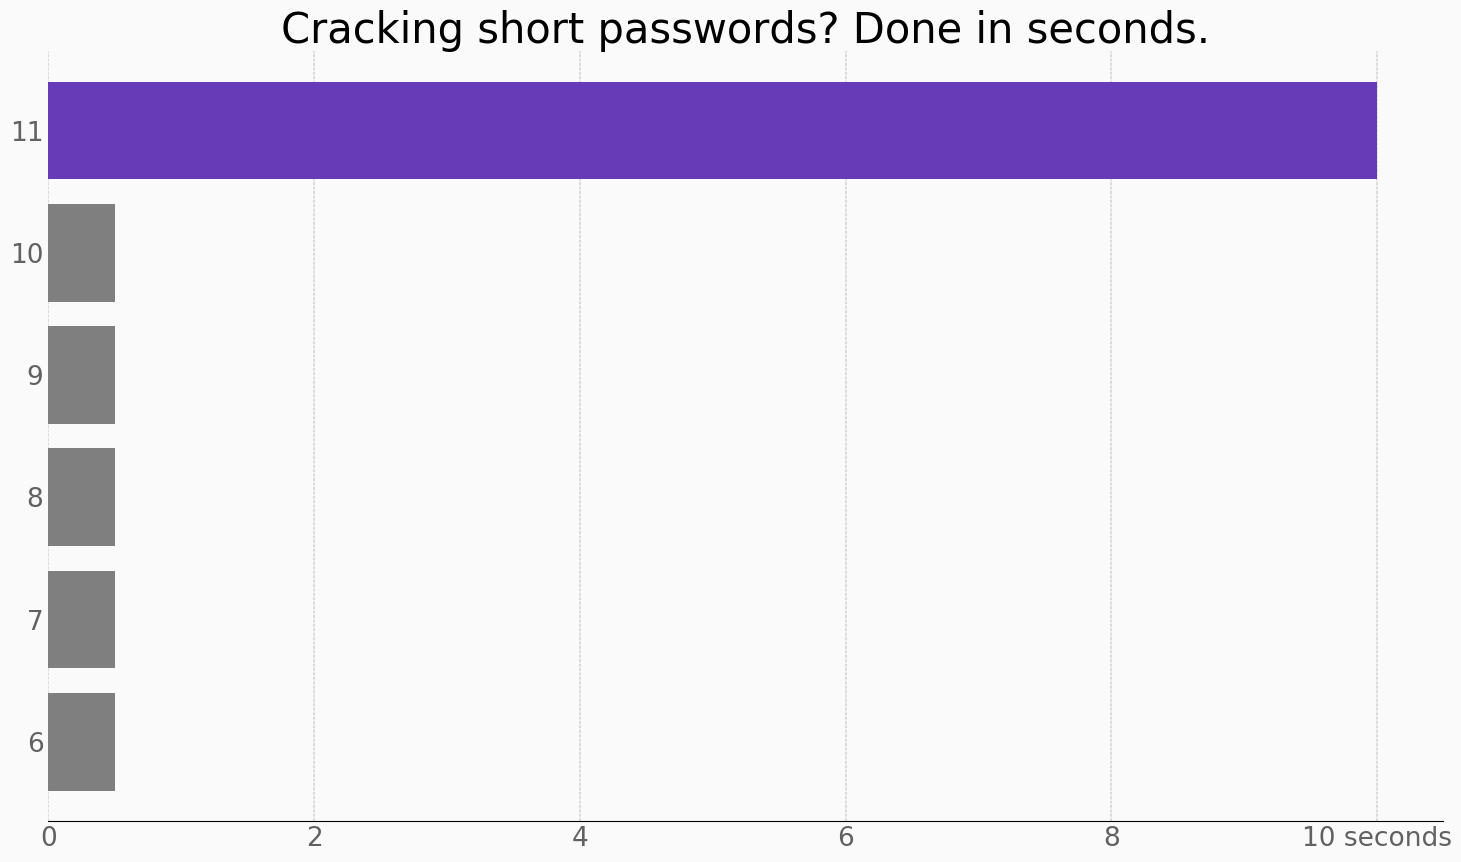

In [57]:
ax = shortest_passwords.plot(kind='barh', x='length', y='seconds_to_crack', color=bar_colors, figsize=(18,10), width=0.8, legend=False)
ax.set_title('Cracking short passwords? Done in seconds.', fontsize=30)
ax.yaxis.grid(False)
ax.xaxis.grid(True)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.set_xticklabels([0, 2, 4, 6, 8, '10 seconds'])
#ax.set_yticklabels([6, 7, 8, 9, 10, '11 characters'])
plt.savefig('shorttest_passwords.pdf', facecolor=plt.rcParams['figure.facecolor'])

In [66]:
short_passwords = df[4:8]
short_passwords

,guesses,length,password,seconds_to_crack,type
4,1000000,10,WGR2TJSEEM,0.5,letter and digits
5,100000000000,11,8VO97OTDXO3,10,letter and digits
6,1000000000000,12,XGYVCXUMNPTD,120,letter and digits
7,10000000000000,13,F66JNLG5XTRV6,1020,letter and digits


In [104]:
def get_color(seconds):
    if seconds > 100:
        return '#FF9E80'
    if seconds > 9:
        return '#673AB7'
    else:
        return '#7f7f7f'

bar_color_new = [get_color(seconds) for seconds in short_passwords.seconds_to_crack]#.sort_values(ascending=False)]
#bar_color_new = bar_color_new[::-1]

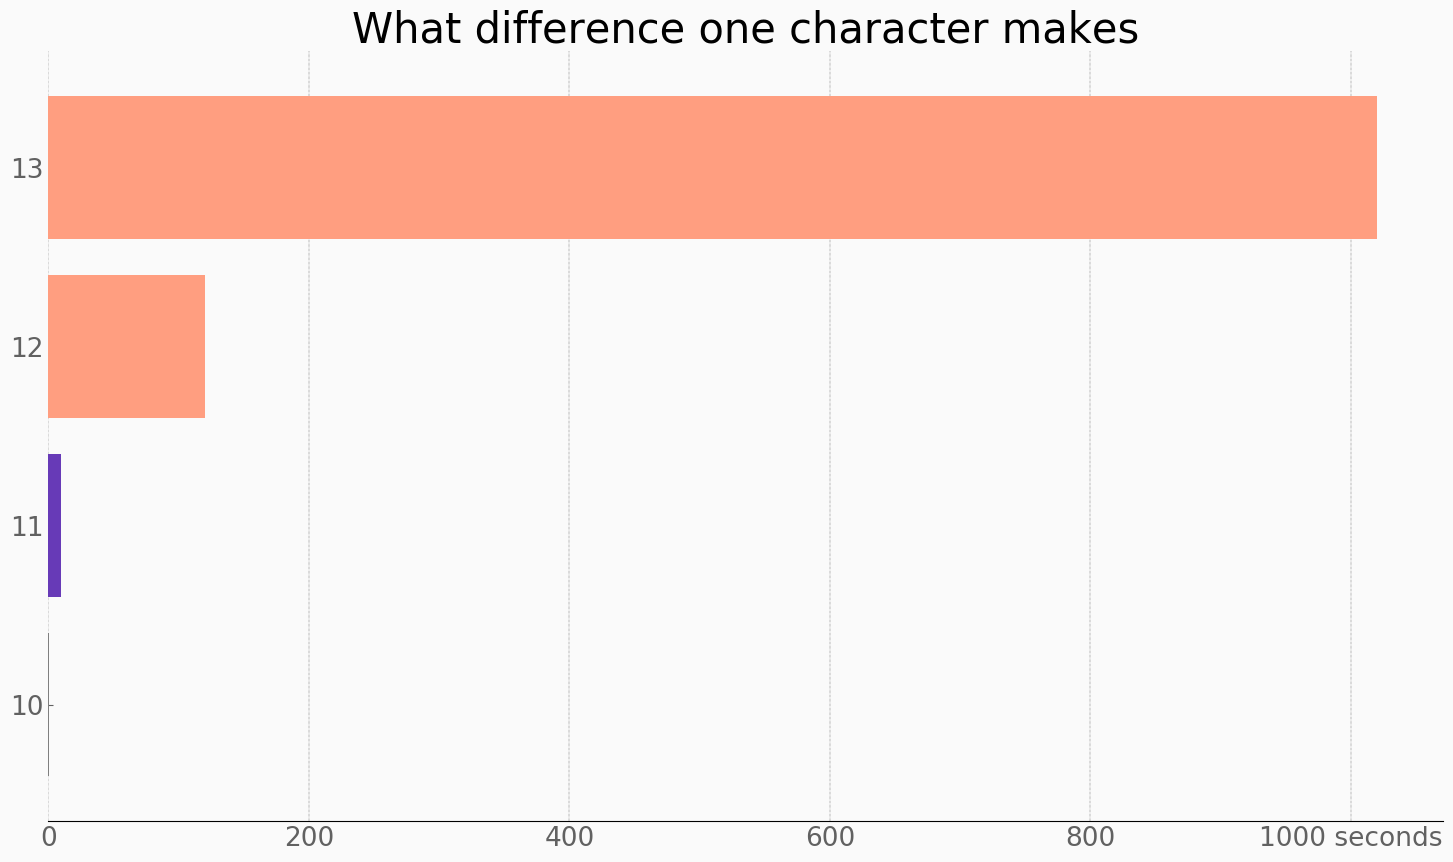

In [115]:
ax = short_passwords.plot(kind='barh', x='length', y='seconds_to_crack', color=bar_color_new, figsize=(18,10), width=0.8, legend=False)
ax.set_title('What difference one character makes', fontsize=30)
ax.yaxis.grid(False)
ax.xaxis.grid(True)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.set_xticklabels([0, 200, 400, 600, 800, '1000 seconds'])
#ax.set_yticklabels([6, 7, 8, 9, 10, '11 characters'])
plt.savefig('short_passwords.pdf', facecolor=plt.rcParams['figure.facecolor'])
#    'axes.prop_cycle': cycler('color', ['#673AB7', '#80DEEA', '#FFD600', '#FF9E80', '#CCFF90', '#8c564b', 
#                                        '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),

In [146]:
long_passwords = df[7:13]
long_passwords

,guesses,length,password,seconds_to_crack,type
7,10000000000000,13,F66JNLG5XTRV6,1020,letter and digits
8,100000000000000,14,500EWHCHLMSPPK,10800,letter and digits
9,1000000000000000,15,HQYZ4C1VUBKB5NN,86400,letter and digits
10,10000000000,16,0HANC9BTGYJXJX05,86400,letter and digits
11,100000000000000000,17,CCTTOZNARZSPCVOIV,10368000,letter and digits
12,1000000000000000000,18,XH409LP9IX7XDU65EK,93312000,letter and digits


In [147]:
def get_color(seconds):
    if seconds > 5500:
        return '#7f7f7f'
    if seconds > 100:
        return '#FF9E80'
    if seconds > 9:
        return '#673AB7'
    else:
        return '#bcbd22'

bar_coloring = [get_color(seconds) for seconds in long_passwords.seconds_to_crack.sort_values(ascending=False)]
#bar_color_new = bar_color_new[::-1]

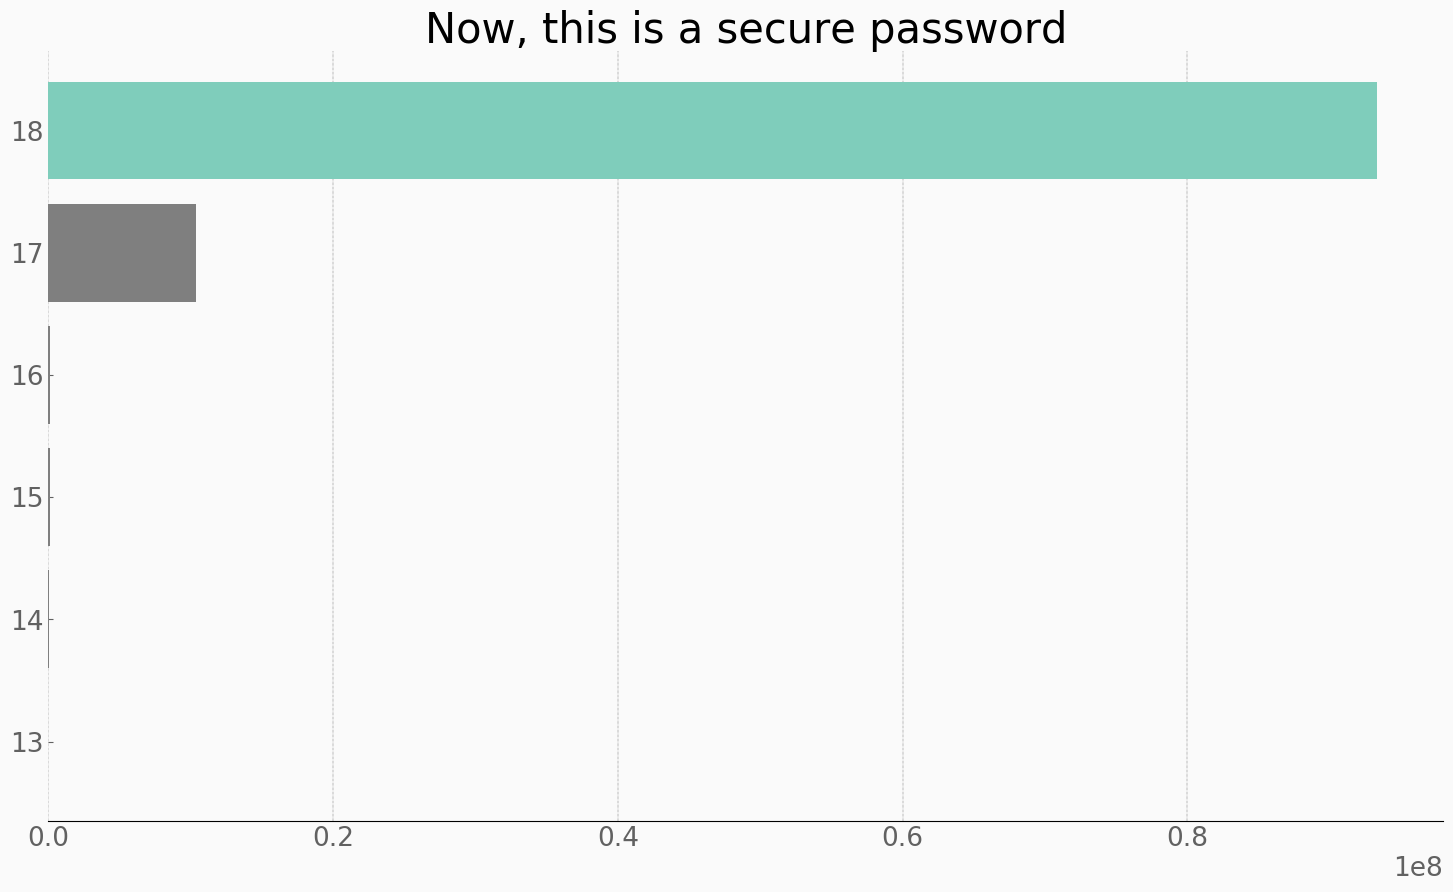

In [166]:
ax = long_passwords.plot(kind='barh', x='length', y='seconds_to_crack', color=['#7fcdbb', '#7f7f7f', '#7f7f7f', '#7f7f7f', '#7f7f7f'], figsize=(18,10), width=0.8, legend=False)
ax.set_title('Now, this is a secure password', fontsize=30)
ax.yaxis.grid(False)
ax.xaxis.grid(True)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
#ax.set_xticklabels([0, 200, 400, 600, 800, '93312000 seconds'])
#ax.set_yticklabels([6, 7, 8, 9, 10, '11 characters'])
plt.savefig('long_passwords.pdf', facecolor=plt.rcParams['figure.facecolor'])
#    'axes.prop_cycle': cycler('color', ['#673AB7', '#80DEEA', '#FFD600', '#FF9E80', '#CCFF90', '#8c564b', 
#                                        '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),

In [ ]:
pw_chars = input('How many characters should your password have?')

In [ ]:
new_pw_chars = (pw_gen_all(int(pw_chars)))
new_pw_chars = new_pw_chars
print('This is your new passphrase:', '"' + str(new_pw_chars)+ '"')

In [ ]:
pw_words = input('How many words should your passphrase have?')

In [ ]:
new_pw_words = (pw_gen_word(int(password_gen)))
new_pw_words = new_pw_words
print('This is your new passphrase:', '"' + str(new_pw_words)+ '"')

In [ ]:
print('This is how long it will take to crack your password:')
pw_check = zxcvbn(new_pw_chars)
print(pw_check['crack_times_display']['offline_fast_hashing_1e10_per_second'])

In [ ]:
class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [ ]:
def length(self):
    return (self.x * 2 + self.y * 2)

In [ ]:
hi = Vector(2, 3)

In [ ]:
length(hi)

In [ ]:
new_thing = Vector(100, 400)

In [ ]:
length(new_thing)